<h1> DETECTION DU CANCER DE SEINS </h1>

In [47]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler,MinMaxScaler
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.feature_selection import RFE,RFECV,chi2,SelectPercentile,SelectKBest
import pickle
from sklearn.model_selection import cross_val_score,GridSearchCV

In [3]:
df = pd.read_csv("C:\\Users\\GENERAL STORES\Desktop\\laboratoire\\archive\\breast-cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
df.shape

(569, 32)

notre data set possede 569 lignes et 32 colones.

<h2>analyse des et comprehension des colones de notre dataset</h2>

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

id : identifians<br>diagnostique:'B'renvoie a benine et 'M' a maline selon si le seins est malade ou pas<br>radius_means:moyen du rayon des cellules dans les echantillons tumoraux<br>texture_mean:moyen de la cellule tumorale <br>perimeter_mean:moyenne du perimetre de la cellule tumorale<br>area_mean:moyenne de l'aire de la cellule tumorle <br>smoothness_mean:moyenne de la douceur des cellules tumoraux<br>compactness_mean:moyenne de la compacite de la cellule tumorale<br>concavity_mean:


In [6]:
df.dtypes.value_counts()

float64    30
int64       1
object      1
Name: count, dtype: int64

toutes les colones de notre dataset sont des entier sauf notre target et la colone id

<h2>analyse des valeurs manquantes<h2>

In [7]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

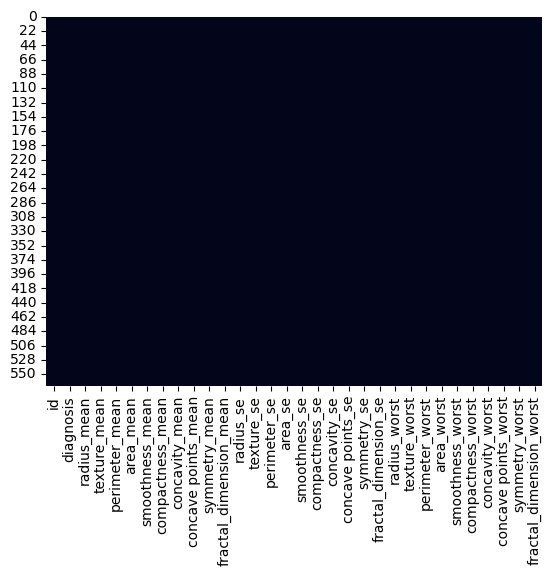

In [8]:
sns.heatmap(df.isna(),cbar=False)

nous observontion qu'il ya pas de valeur manquante dans notre data ce qui montre la pertinance de chaque valeur de notre dataset

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2>analyse de la target</h2>

In [10]:
pd.set_option("display.max_rows",32)
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [11]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

nous avons 357 femme de type benine et 212 de type maline donc divise en 2 groupes

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<h2>visualisation de la target</h2>

<Axes: xlabel='diagnosis', ylabel='count'>

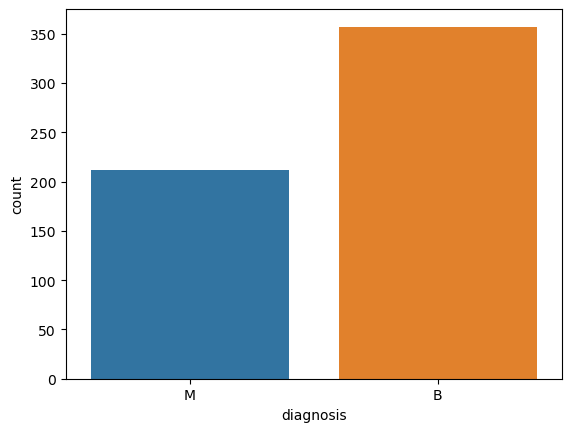

In [13]:
sns.countplot(data=df,x='diagnosis')

nous avons 357 femme de type benine et 212 de type maline donc divise en 2 groupes

<h2>visualisation de la data en fonction de la target</h2>

pour cela nous pouvons observer la corelation dentre les variables.nous devons supprimer la colone qui ne nous sert pas qui est id

In [14]:
df.drop(columns='id',axis=1,inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


nous allons encoder la colone de la target

In [15]:
encodeur = LabelEncoder()
df['diagnosis']=encodeur.fit_transform(df['diagnosis'])

In [16]:
pd.set_option('display.max_rows',569)
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     0
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     1
54     1
55     0
56     1
57     1
58     0
59     0
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     0
68     0
69     0
70     1
71     0
72     1
73     1
74     0
75     1
76     0
77     1
78     1
79     0
80     0
81     0
82     1
83     1
84     0
85     1
86     1
87     1
88     0
89     0
90     0
91     1
92     0
93     0
94     1
95     1
96     0
97     0
98     0
99     1
100    1
101    0
102    0
103    0
104    0
105    1
106    0
107    0
108    1
109    0
110    0
1

corelation entre les differrentes variable

In [17]:
df.corr().T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


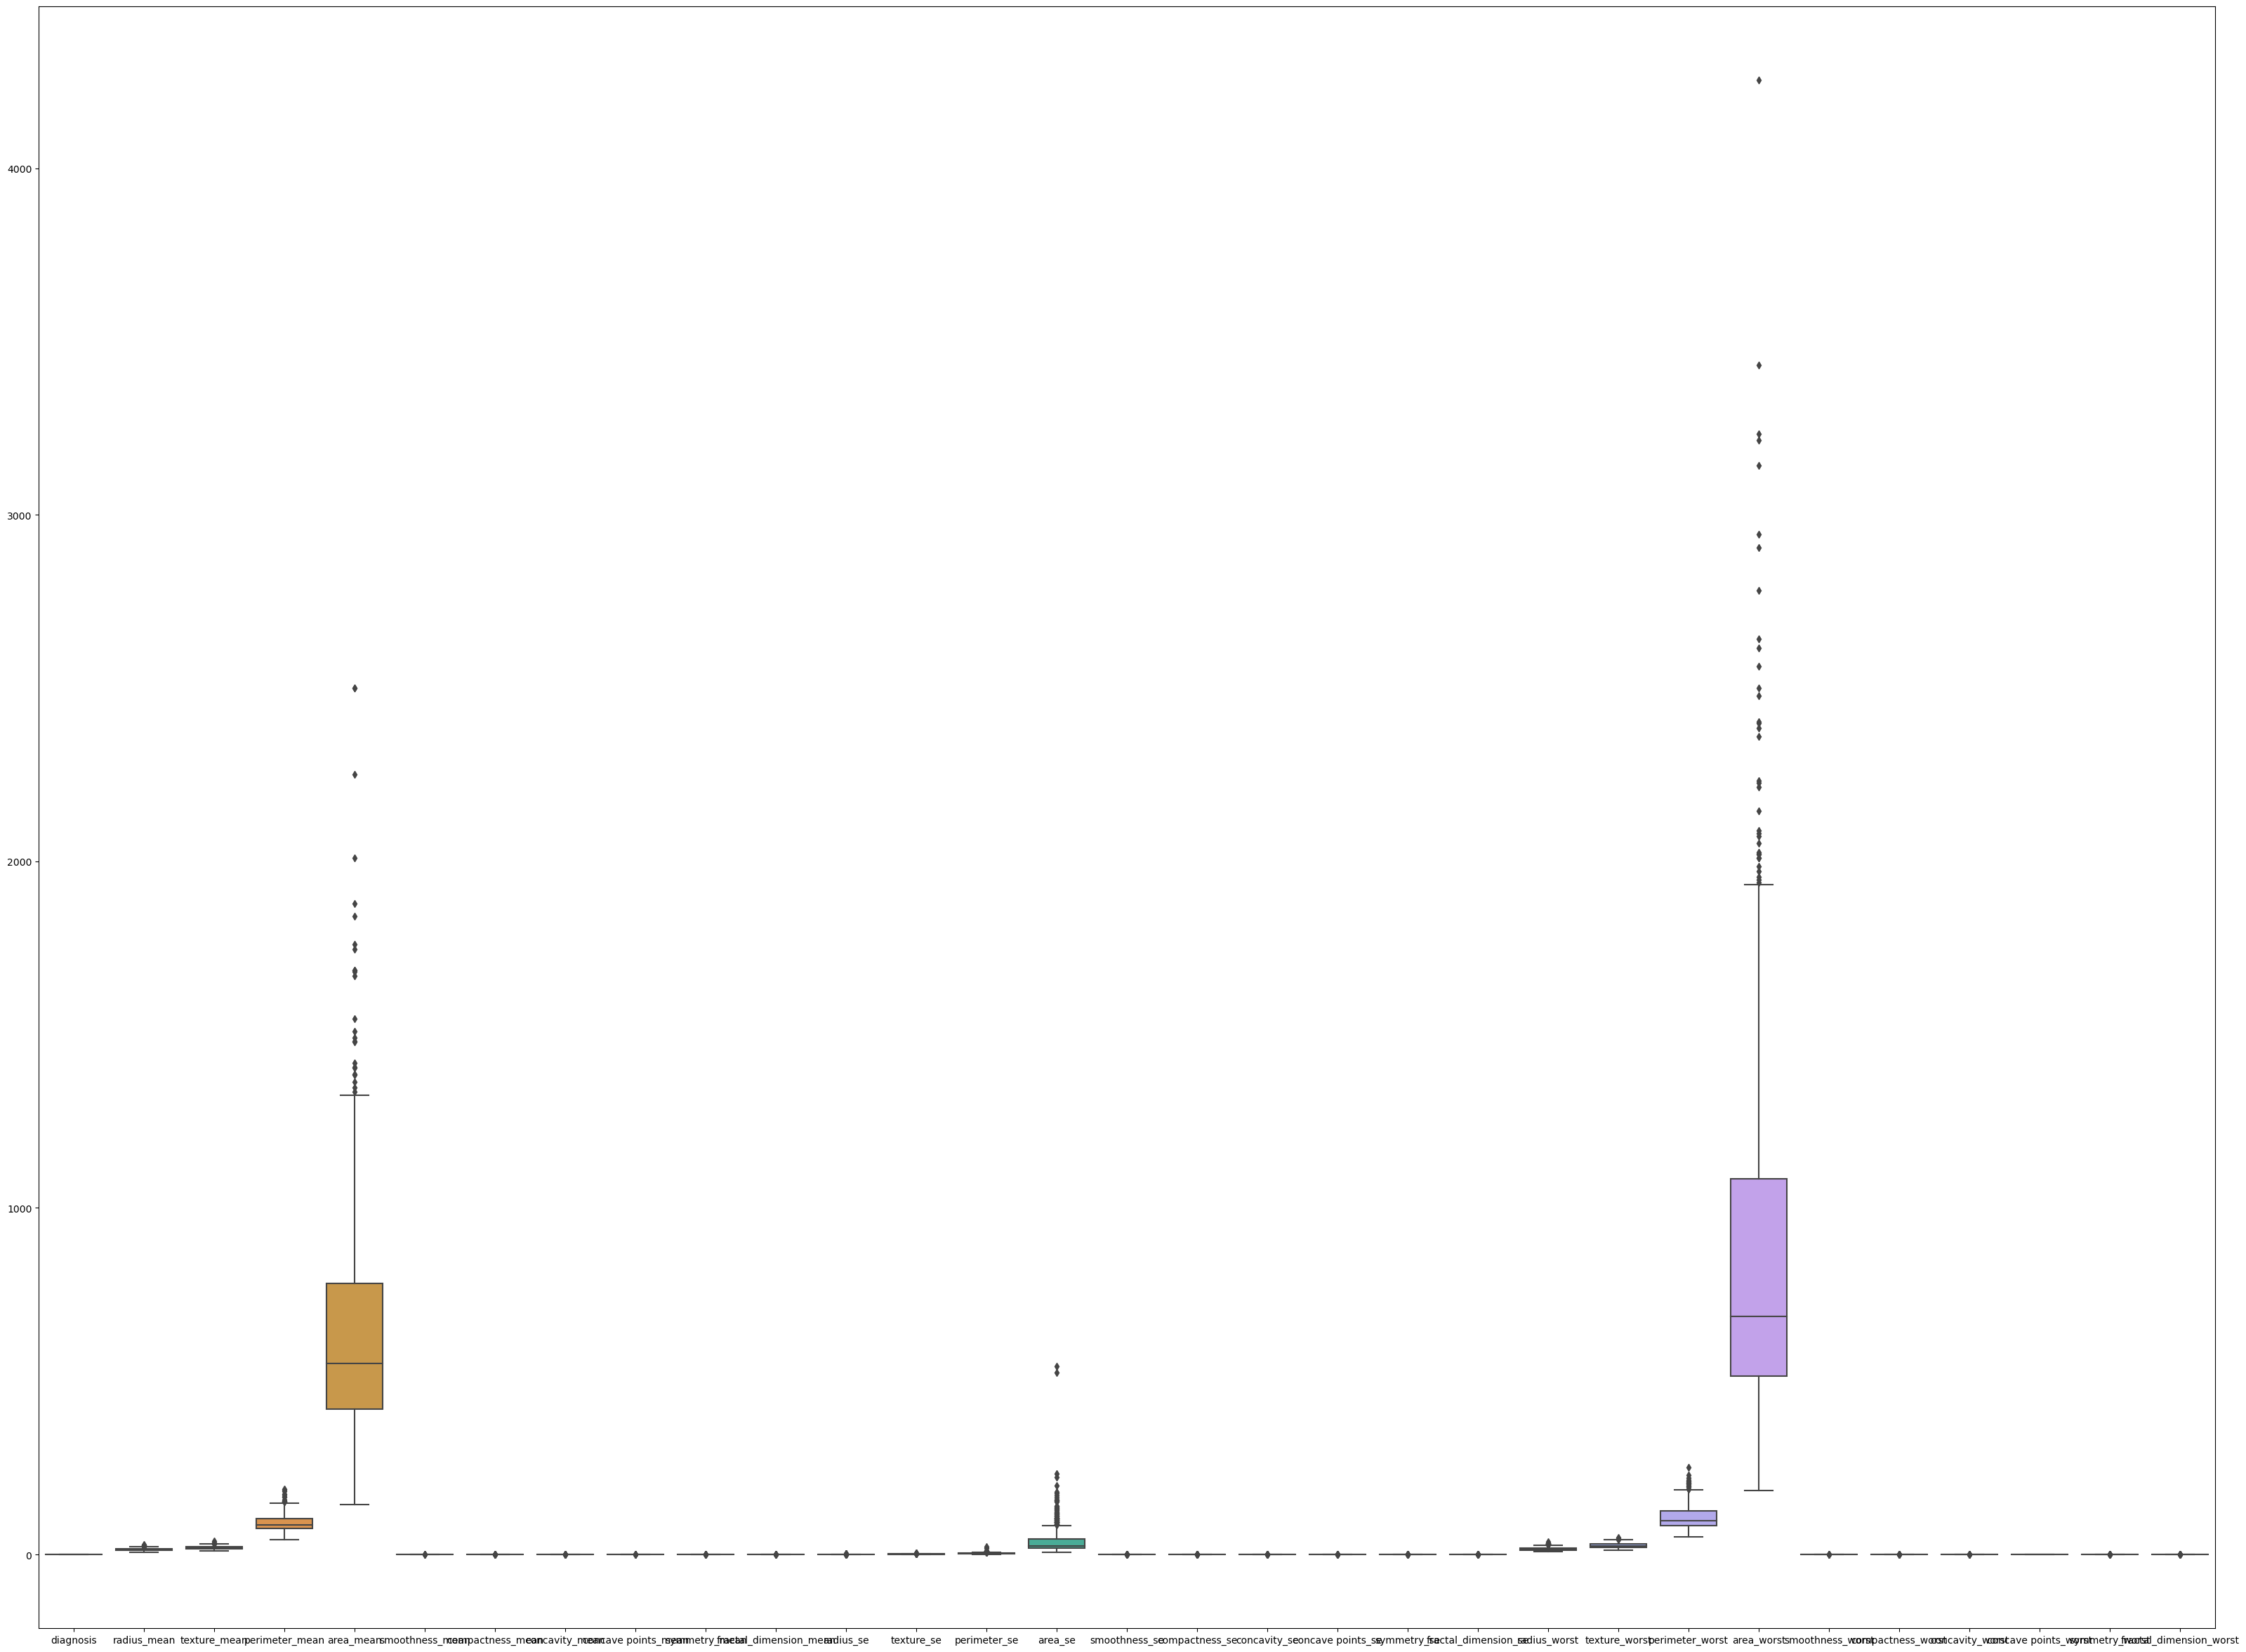

In [18]:
plt.figure(figsize=(40,30))
sns.boxplot(data=df)
plt.show()

sur notre gr

C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


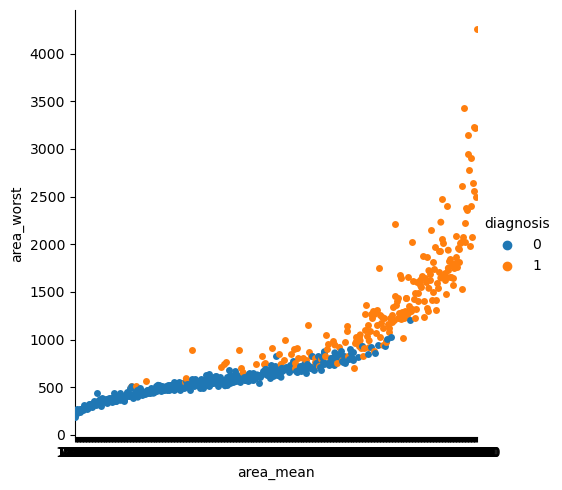

In [19]:
sns.catplot(data=df,x='area_mean',y='area_worst',hue='diagnosis')

nous constatons que moins est la moyenne de l'air des cellules ,le seins est moins infecte au dela d'une moyenne de rayon a 17,le seins es copletement affecte donc nous pouvons conclure que ces 2 variables peuvent nous indiquer sur l'etat des seins en profondeur

<h2>preprocessing</h2>

In [20]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [21]:
X_numerique = make_column_selector(dtype_include=np.number)
X_categoriel = make_column_selector(dtype_exclude=np.number)
X_categoriel

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
y_train = pd.DataFrame(y_train)
y_train

(455, 30)
(455,)
(114, 30)
(114,)


,diagnosis
317,1
106,0
447,0
265,1
426,0
160,0
203,1
559,0
141,1
359,0


In [23]:
numerique_pipeline = make_pipeline(MinMaxScaler())
categoriel_pipeline = make_pipeline(LabelEncoder(),StandardScaler())
categoriel_pipeline
numerique_pipeline


Pipeline(steps=[('minmaxscaler', MinMaxScaler())])

In [24]:
transformeur = make_column_transformer((numerique_pipeline,X_numerique),(categoriel_pipeline,X_categoriel))
transformeur

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002BB9C451110>),
                                ('pipeline-2',
                                 Pipeline(steps=[('labelencoder',
                                                  LabelEncoder()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002BB9E2DAE10>)])

In [25]:
#selector = SelectPercentile(chi2,percentile=50)
#selector.fit_transform(X_train,y_train)
#selector.get_support()
selector = SelectKBest(chi2,k=10)
selector.fit_transform(X_train,y_train)
np.array(X.columns)[selector.get_support()]


array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'], dtype=object)

In [26]:
models ={
    'LinearRegression':LinearRegression(),
    ' SVR': SVR(),
    ' RandomForestRegressor': RandomForestRegressor(),
    'RandomForestClassifier':RandomForestClassifier(),
}
models

{'LinearRegression': LinearRegression(),
 ' SVR': SVR(),
 ' RandomForestRegressor': RandomForestRegressor(),
 'RandomForestClassifier': RandomForestClassifier()}

In [27]:
for nom,model in models.items():
    modele = make_pipeline(transformeur,model)
    modele.fit(X_train,y_train)
    print(f" {nom}:{modele.score(X_train,y_train)}")

 LinearRegression:0.7714574712611786
  SVR:0.9081443803438866


C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


  RandomForestRegressor:0.979260652066727


C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 RandomForestClassifier:1.0


<h2>autre methode</h2>

In [28]:
scaler =MinMaxScaler()
X_scaler = scaler.fit_transform(X)
new_X_sclaer = pd.DataFrame(X_scaler,columns=X.columns)
new_X_sclaer

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000


In [29]:
robust = RobustScaler()
X_robust = robust.fit_transform(X_scaler)
new_X_robust = pd.DataFrame(X_robust,columns=X.columns)
new_X_robust

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099
5,-0.225490,-0.557726,-0.126858,-0.204194,1.686741,1.181582,0.951750,0.882660,0.872781,1.732779,...,0.086505,-0.192130,0.139017,0.096888,1.625850,1.631058,1.150522,0.768840,1.722963,2.151309
6,1.196078,0.202487,1.153128,1.349062,-0.065504,0.250000,0.505833,0.754330,0.005917,-0.489311,...,1.368512,0.260417,1.345120,1.616845,0.438776,0.238145,0.565201,0.966829,0.357037,0.176528
7,0.083333,0.353464,0.136882,0.073951,1.216587,1.097587,0.317580,0.490780,1.195266,1.540380,...,0.361592,0.315972,0.313393,0.370142,1.159864,0.814487,0.153130,0.577071,0.554074,1.700291
8,-0.090686,0.529307,0.043553,-0.086369,1.660328,1.535889,1.229583,1.118085,1.650888,1.466746,...,0.089965,0.615741,0.206830,0.092843,1.326531,1.710266,1.163562,1.099513,2.305185,1.317168
9,-0.223039,0.923623,-0.078465,-0.207506,1.200740,2.244502,1.638916,0.967219,0.704142,2.480998,...,0.020761,1.767361,-0.000242,0.043784,1.836735,4.409067,3.272355,1.255002,2.287407,6.181377


In [30]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X_robust,y,test_size=0.2)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [31]:
models ={
    'LinearRegression':LinearRegression(),
    ' SVR': SVR(),
    ' RandomForestRegressor': RandomForestRegressor(),
    'RandomForestClassifier':RandomForestClassifier(),
}
models

{'LinearRegression': LinearRegression(),
 ' SVR': SVR(),
 ' RandomForestRegressor': RandomForestRegressor(),
 'RandomForestClassifier': RandomForestClassifier()}

In [32]:
model =LinearRegression()
model.fit(X1_train,y1_train)
model.score(X1_train,y1_train)

0.7702671913099841

In [33]:
model =RandomForestRegressor()
model.fit(X1_train,y1_train)
model.score(X1_train,y1_train)

0.9766526933190895

In [50]:
param = {
    'n_estimators':[100,250,300,350]
}
grid = GridSearchCV(RandomForestClassifier(),param_grid=param,cv=5)
grid.fit(X_train,y_train)

C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 250, 300, 350]})

In [51]:
grid.best_params_

{'n_estimators': 250}

In [52]:
grid.best_score_

0.9604395604395604

In [53]:
model1 = grid.best_estimator_

In [54]:
modele_final = make_pipeline(transformeur,selector, model1)
modele.fit(X_train,y_train)  
modele.score(X_test,y_test)

C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.956140350877193

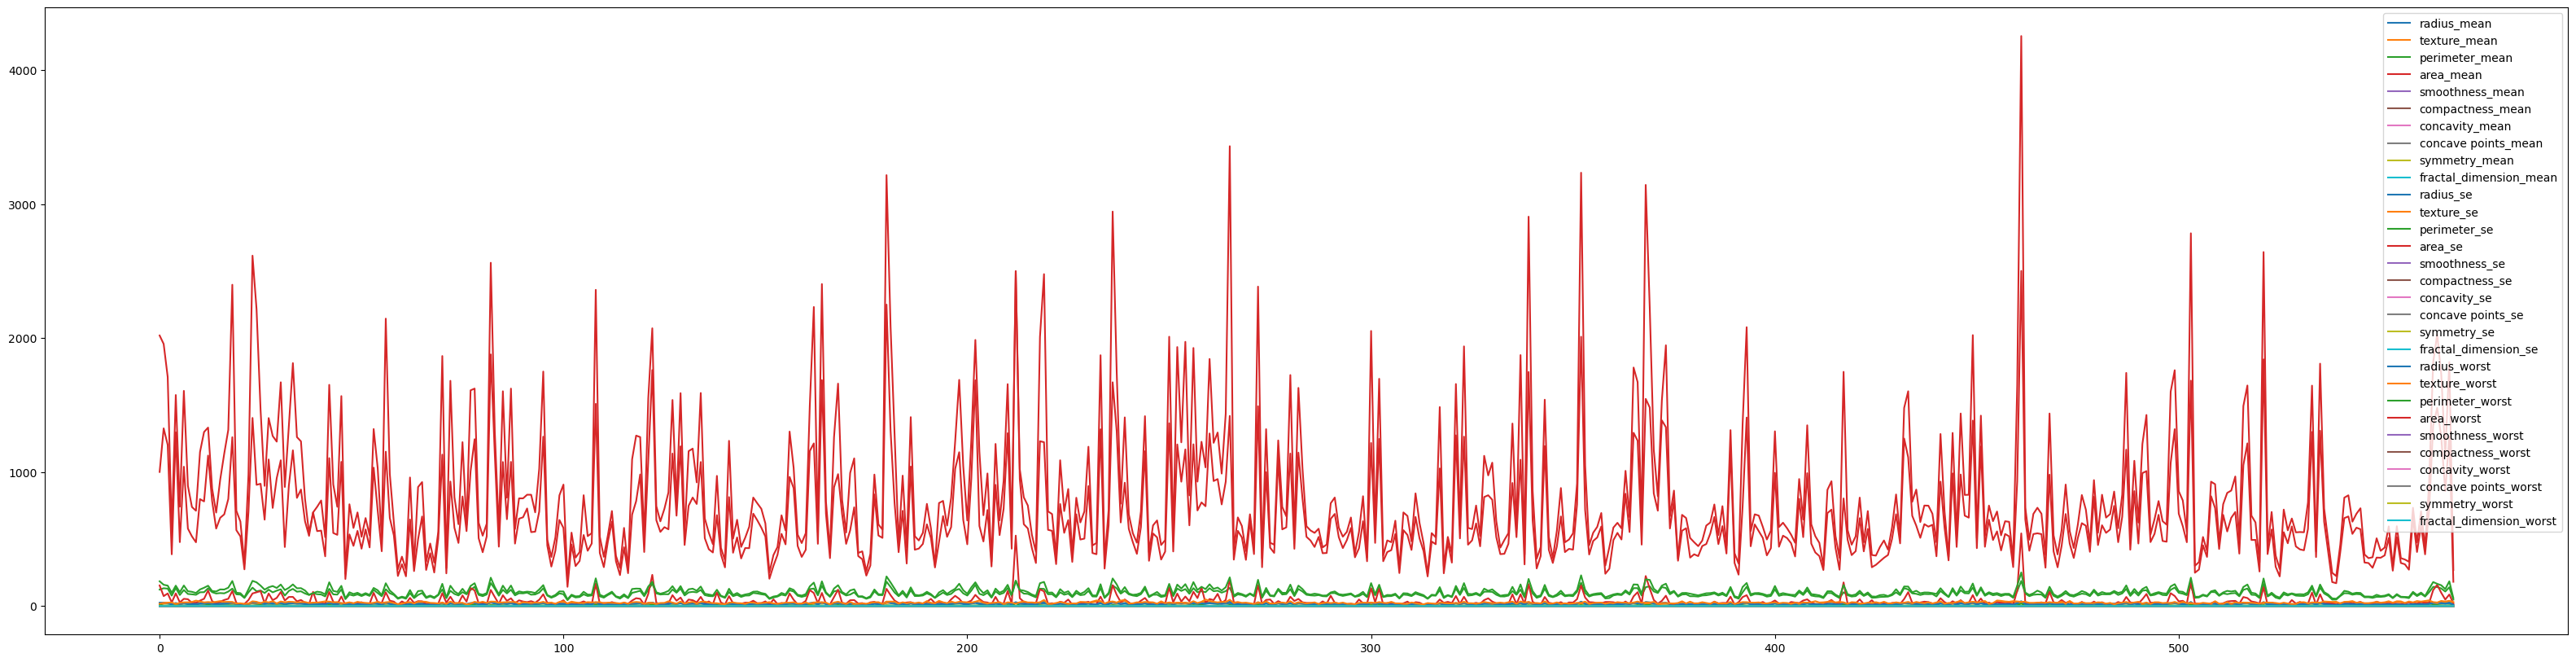

In [35]:
plt.figure(figsize=(40,10))
plt.plot(X)
plt.legend(X.columns)

In [40]:
X.var(axis=0)

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

In [57]:
from sklearn.model_selection import learning_curve

In [62]:
N,train_score,val_score=learning_curve(modele_final,X_train,y_train,train_sizes=np.linspace(0.2,1.0,10),cv=5)
p=np.linspace(0.2,1.0,10)
print(N)
print(p)


C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\GENERAL STORES\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

[ 72 105 137 169 202 234 266 299 331 364]
[0.2        0.28888889 0.37777778 0.46666667 0.55555556 0.64444444
 0.73333333 0.82222222 0.91111111 1.        ]


In [46]:
#score = cross_val_score(modele_final,X_train,y_train,cv=5,scoring='accuracy').mean()
#score

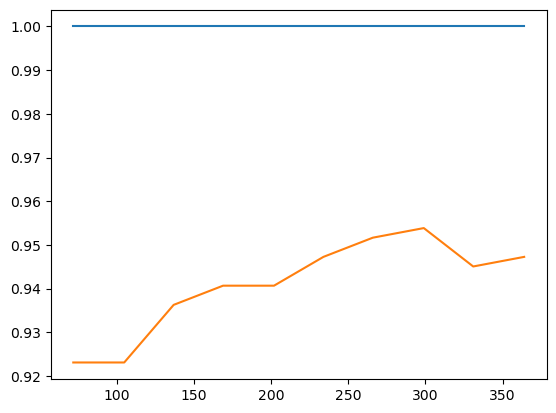

In [63]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='val')


In [ ]:
pickle.dump(modele_final,open('model.pkl','wb'))